> # 데이터 과학을 위한 통계 서적 기반의 통계 정리

- 추후 작업해야 하는 부분은 @@으로 표시할 것

# Chapter 1. 탐색적 데이터 분석

In [58]:
import pandas as pd
import numpy as np

import scipy as sp
from scipy import stats
from scipy.stats import iqr

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. 위치추정

- 평균(mean) : 모든 값의 총 합을 개수로 나눈 것
- 가중평균(weighted mean) : 가중치를 곱한 값의 총합을 가중치의 총합으로 나눈 것
- 중간값(median) : 데이터에서 중앙에 위치 한 값. 데이터가 짝수인 경우 중간에 있는 두 데이터의 평균으로 선정
- 가중중간값(weighted median) : 데이터를 순서대로 정렬하고, 데이터의 가중치 합을 누적하여 중간 값이 되는 지점의 데이터를 선정.
- 절사평균(trimmed mean) : 정해진 개수의 이상치를 제거하고 나머지 값들의 평균을 구하는 것
- 로버스트(robust) : 이상치에 민감하지 않은 것을 의미(이상치가 들어와도 median을 구하면 값의 변동의 거의 없으므로 로버스트함)
- 이상치(outliar) : 데이터의 일반적인 범위에서 크게 벗어나는 값

In [2]:
data = pd.read_csv('data/state.csv')
data.head(10)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA


> 1. 일반적인 평균(Average)

In [14]:
data.mean()

Population     6162876.300
Murder.Rate          4.066
dtype: float64

> 2. 절사평균 평균 값(Trimmed average)

In [15]:
## 상하위 10%의 데이터를 제외한 절사평균
stats.trim_mean(data.Population, 0.1)

4783697.125

> 3. 가중평균(Weighted Average)

In [16]:
np.average(data['Murder.Rate'], weights=data.Population)

4.445833981123393

> 4. 가중 중간값(Weighted Median)

In [18]:
## @@추후 작업
## 모듈이 있으나 최근 업데이트가 없는 모듈로 확인 됨
## 직접 만들거나 모듈을 면밀히 확인 후 넣을 것

> 5. 중간값(Median)

In [19]:
data.median()

Population     4436369.5
Murder.Rate          4.0
dtype: float64

## 2. 변위추정

- 편차(Deviation) : 관측값과 평균 값의 차이(오차, 잔차)
- 분산(Variance) : 편차 제곱의 합을 n-1로 나눈 값, n은 데이터의 수
- 표준편차(standard deviation) : 분산의 제곱근(l2 norm, 유클리드 norm)
- 평균절대편차(mean absolute deviation) : 각 편차의 절대값을 더하고 데이터의 수로 나눈 것(l1 norm, 멘하트norm)
- 중간값의 중위절대편차(mean absolute deviation from the median) : 각 편차의 절대값 중 중간값
- 범위(range) : 데이터의 최소와 최대의 범위
- 순서통계량(order statistics) : 최소에서 최대로 데이터가 순차적으로 정렬된 것(순위)

> 1. 표준편차(standard deviation)

In [26]:
np.std(data['Population'])

6779407.114632265

> 2. 사분위범위(IQR)

In [27]:
iqr(data['Population'])

4847308.0

> 3. 중위절대편차(mean absolute deviation)

In [30]:
sp.stats.median_absolute_deviation(data['Population'])

3849870.3852

## 3. 데이터 분포 탐색

> 1. 백분위 수(Percentile)

In [35]:
## q에 몇 퍼센트의 백분위 수를 볼 것인지 리스트 형태로 입력
np.quantile(data['Murder.Rate'], q=[0.05, 0.25, 0.5, 0.75, 0.95])

array([1.6  , 2.425, 4.   , 5.55 , 6.51 ])

> 2. 상자그림(boxplot)

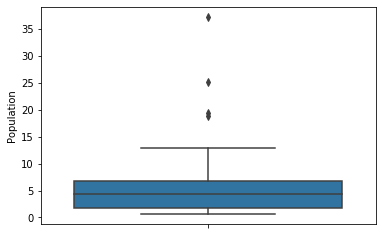

In [65]:
sns.boxplot(y=data["Population"]/1000000)

{'whiskers': [<matplotlib.lines.Line2D at 0x20b03259648>,
 'caps': [<matplotlib.lines.Line2D at 0x20b032469c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x20b03259588>],
 'medians': [<matplotlib.lines.Line2D at 0x20b03293548>],
 'fliers': [<matplotlib.lines.Line2D at 0x20b032932c8>],
 'means': []}

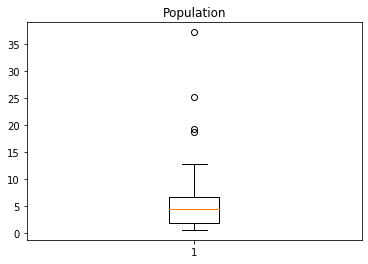

In [67]:
fig1, ax1 = plt.subplots()
ax1.set_title('Population')
ax1.boxplot(data['Population']/1000000)

> 3. 히스토그램(histogram)

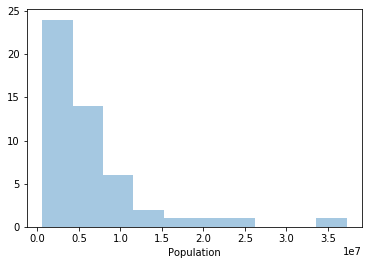

In [87]:
## bins는 나누는 구간을 나타낸다
## kde는 gaussian kernel density으로 데이터의 밀도를 나타낸다
sns.distplot(data['Population'], bins=10 ,kde = False)

> 4.밀도추정

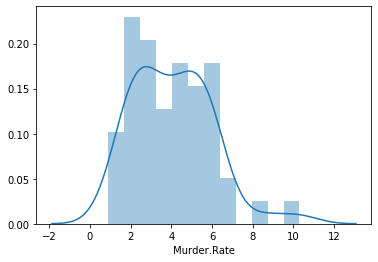

In [88]:
### kde는 gaussian kernel density으로 데이터의 밀도를 나타낸다
sns.distplot(data['Murder.Rate'], bins=12, kde = True)

## 4. 이진데이터와 범주데이터

- 최빈값(mode) : 전체 데이터에서 가장 자주 나타나는 값
- 기댓값(expected value) : 범주에 해당하는 어떤 수치가 있을 때, 범주의 출현 확률에 따른 평균
- 막대도표(bar chart) : 각 범주의 빈도수 혹은 비율을 막대로 나타낸 것
- 파이그림(pie chart) 각 범주의 빈도수 혹은 비율을 부채꼴 모양으로 나타낸 것

In [117]:
data_index = ['Carrier', 'ATC', 'Weather', 'Security', 'Inbound']
data_value = [23.02, 30.40, 4.03, 0.12, 42.43]
data = pd.DataFrame(data_value,data_index)

In [116]:
data

,0
Carrier,23.02
ATC,30.40
Weather,4.03
Security,0.12
Inbound,42.43
